In [1]:
import pandas as pd

# Load the dataset
file_path = './materials.csv'
df = pd.read_csv(file_path)

In [2]:
df.head()

,Std,ID,Material,Heat treatment,Tensile_Strength(MPa),Yield_Strength(MPa),Strain,BHN,Elastic_Modulus,Shear_Modulus,Poisson_Ratio,Density,Pressure_at_Yield,Desc,HV,Annotation,rating
0,ANSI,D8894772B88F495093C43AF905AB6373,Steel SAE 1015,as-rolled,421,314,39.0,126.0,207000,79000,0.3,7860,NaN,NaN,NaN,Yes,4
1,ANSI,05982AC66F064F9EBC709E7A4164613A,Steel SAE 1015,normalized,424,324,37.0,121.0,207000,79000,0.3,7860,NaN,NaN,NaN,Yes,4
2,ANSI,356D6E63FF9A49A3AB23BF66BAC85DC3,Steel SAE 1015,annealed,386,284,37.0,111.0,207000,79000,0.3,7860,NaN,NaN,NaN,Yes,3
3,ANSI,1C758F8714AC4E0D9BD8D8AE1625AECD,Steel SAE 1020,as-rolled,448,331,36.0,143.0,207000,79000,0.3,7860,NaN,NaN,NaN,Yes,5
4,ANSI,DCE10036FC1946FC8C9108D598D116AD,Steel SAE 1020,normalized,441,346,35.8,131.0,207000,79000,0.3,7860,550.0,NaN,NaN,Yes,5


**Checking presence of null values**

In [3]:
#checking empty data
for col in df.columns:
    print(col,":",round(df[col].isnull().sum()/df.shape[0]*100,2),"%")

Std : 0.0 %
ID : 0.0 %
Material : 0.0 %
Heat treatment : 48.32 %
Tensile_Strength(MPa) : 0.0 %
Yield_Strength(MPa) : 0.0 %
Strain : 13.27 %
BHN : 70.17 %
Elastic_Modulus : 0.0 %
Shear_Modulus : 0.0 %
Poisson_Ratio : 0.0 %
Density : 0.0 %
Pressure_at_Yield : 87.56 %
Desc : 36.79 %
HV : 89.37 %
Annotation : 0.0 %
rating : 0.0 %


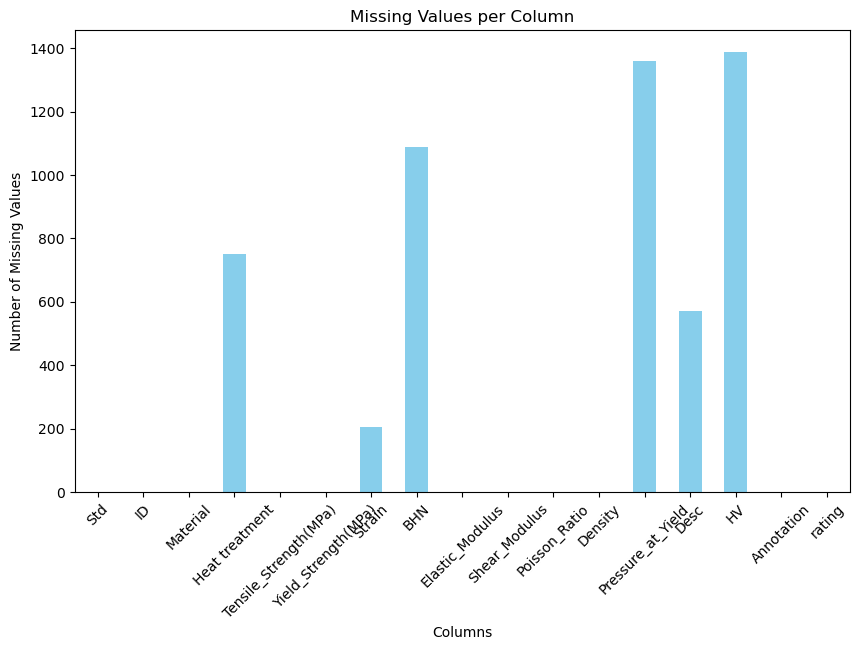

In [4]:
import matplotlib.pyplot as plt
missing_values = df.isnull().sum()

# Plot a bar plot for missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

**->It can be seen that BHN, Pressure_at_Yield and HV have null values more than 50%. So they can be removed.**

In [5]:
df.drop(columns=["BHN","Pressure_at_Yield","HV"],inplace=True)

In [6]:
df.head(1)

,Std,ID,Material,Heat treatment,Tensile_Strength(MPa),Yield_Strength(MPa),Strain,Elastic_Modulus,Shear_Modulus,Poisson_Ratio,Density,Desc,Annotation,rating
0,ANSI,D8894772B88F495093C43AF905AB6373,Steel SAE 1015,as-rolled,421,314,39.0,207000,79000,0.3,7860,NaN,Yes,4


**Since Std, ID and Desc are not useful columns, so they can be dropped.**

In [7]:
df.drop(columns=["Std","ID","Desc"],inplace=True)

In [8]:
df.head()

,Material,Heat treatment,Tensile_Strength(MPa),Yield_Strength(MPa),Strain,Elastic_Modulus,Shear_Modulus,Poisson_Ratio,Density,Annotation,rating
0,Steel SAE 1015,as-rolled,421,314,39.0,207000,79000,0.3,7860,Yes,4
1,Steel SAE 1015,normalized,424,324,37.0,207000,79000,0.3,7860,Yes,4
2,Steel SAE 1015,annealed,386,284,37.0,207000,79000,0.3,7860,Yes,3
3,Steel SAE 1020,as-rolled,448,331,36.0,207000,79000,0.3,7860,Yes,5
4,Steel SAE 1020,normalized,441,346,35.8,207000,79000,0.3,7860,Yes,5


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Material'] = le.fit_transform(df['Material'])



In [10]:
df.head(1)

,Material,Heat treatment,Tensile_Strength(MPa),Yield_Strength(MPa),Strain,Elastic_Modulus,Shear_Modulus,Poisson_Ratio,Density,Annotation,rating
0,1126,as-rolled,421,314,39.0,207000,79000,0.3,7860,Yes,4


In [11]:
ht = LabelEncoder()
df['Heat treatment'] = ht.fit_transform(df['Heat treatment'])

In [12]:
df.head(1)

,Material,Heat treatment,Tensile_Strength(MPa),Yield_Strength(MPa),Strain,Elastic_Modulus,Shear_Modulus,Poisson_Ratio,Density,Annotation,rating
0,1126,31,421,314,39.0,207000,79000,0.3,7860,Yes,4


In [13]:
ano = LabelEncoder()
df['Annotation'] = ht.fit_transform(df['Annotation'])

In [14]:
df.dtypes

Material                   int64
Heat treatment             int64
Tensile_Strength(MPa)      int64
Yield_Strength(MPa)        int64
Strain                   float64
Elastic_Modulus            int64
Shear_Modulus              int64
Poisson_Ratio            float64
Density                    int64
Annotation                 int64
rating                     int64
dtype: object

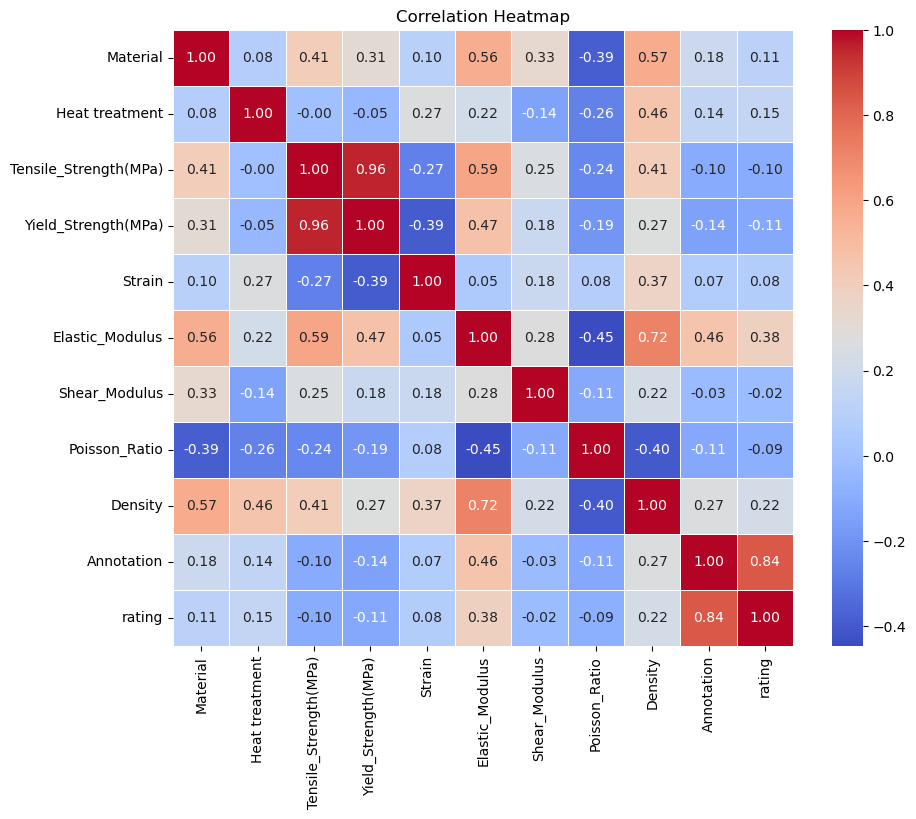

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**From above correlation matrix, it can be seen that Tensile strength and Yield strength have very high correlation of around 0.96.
Hence One of them can be removed.**

In [16]:
df.drop("Yield_Strength(MPa)",axis=1,inplace=True)

In [17]:
df.head(1)

,Material,Heat treatment,Tensile_Strength(MPa),Strain,Elastic_Modulus,Shear_Modulus,Poisson_Ratio,Density,Annotation,rating
0,1126,31,421,39.0,207000,79000,0.3,7860,1,4


In [18]:
df.isnull().sum()

Material                   0
Heat treatment             0
Tensile_Strength(MPa)      0
Strain                   206
Elastic_Modulus            0
Shear_Modulus              0
Poisson_Ratio              0
Density                    0
Annotation                 0
rating                     0
dtype: int64

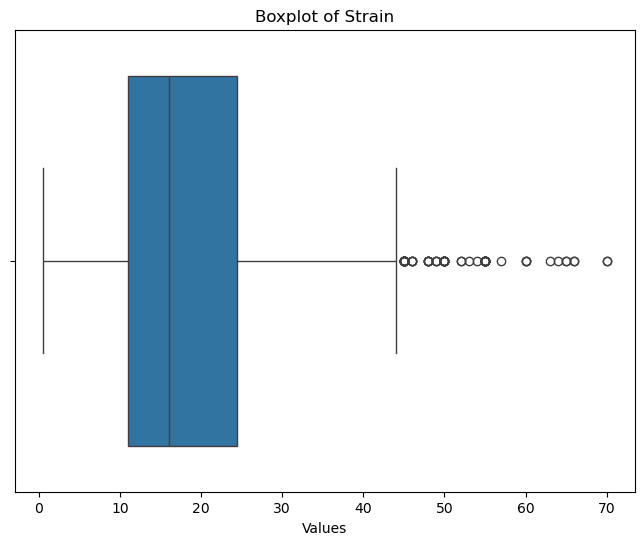

In [19]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Strain'])

# Customize the plot
plt.title('Boxplot of Strain')
plt.xlabel('Values')

# Display the plot
plt.show()

***Since outlier is present in Strain. And strain of different material is different. So mean, median won't be the suitable for filling
the values of NaN. Hence interpolation is used.***

In [20]:
df["Strain"] = df["Strain"].interpolate(method='linear')

In [21]:
df.isnull().sum()

Material                 0
Heat treatment           0
Tensile_Strength(MPa)    0
Strain                   0
Elastic_Modulus          0
Shear_Modulus            0
Poisson_Ratio            0
Density                  0
Annotation               0
rating                   0
dtype: int64

In [22]:
df.to_csv("./Prepared_data.csv",index=False)

***Data prepared successfully***

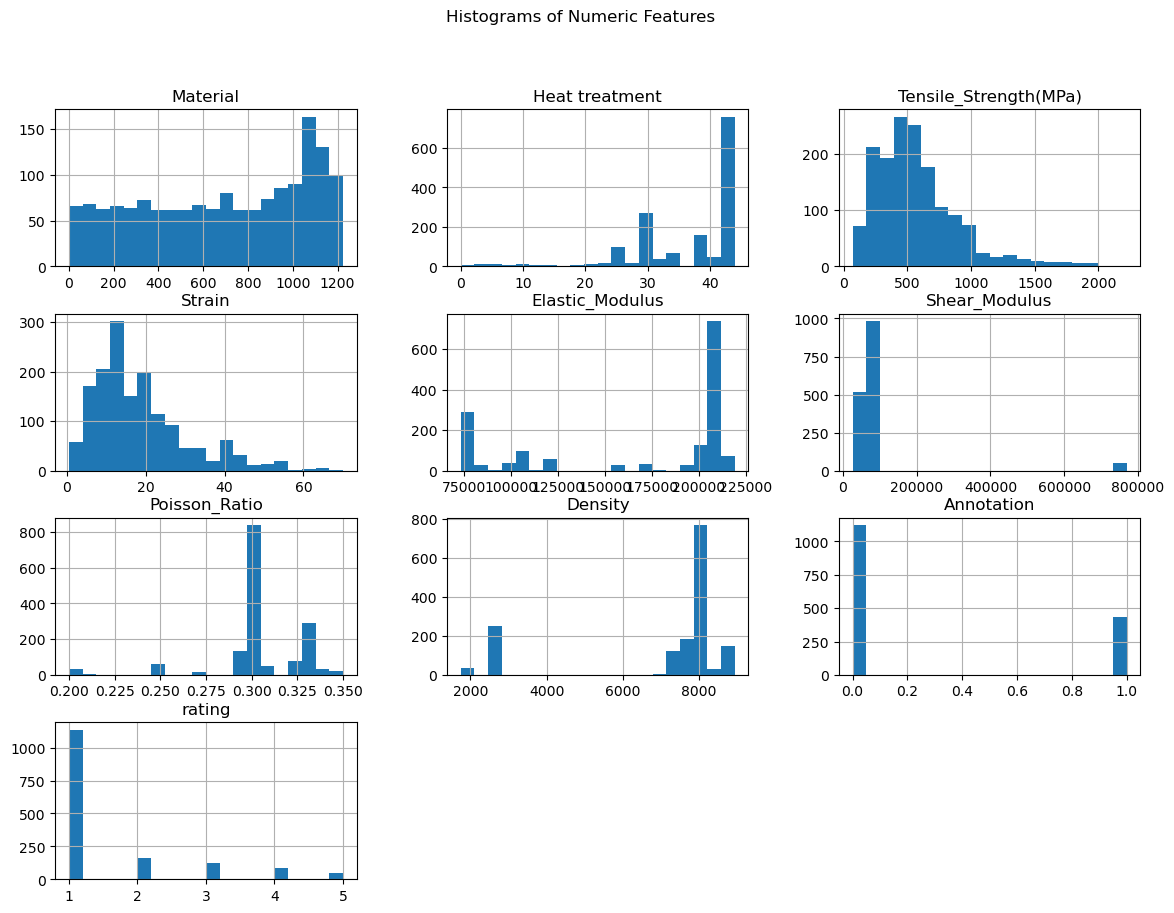

In [23]:
df.hist(bins=20, figsize=(14, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

***From above plot, it can be seen that the value of Tensile Strength and Strain column are left skewed***

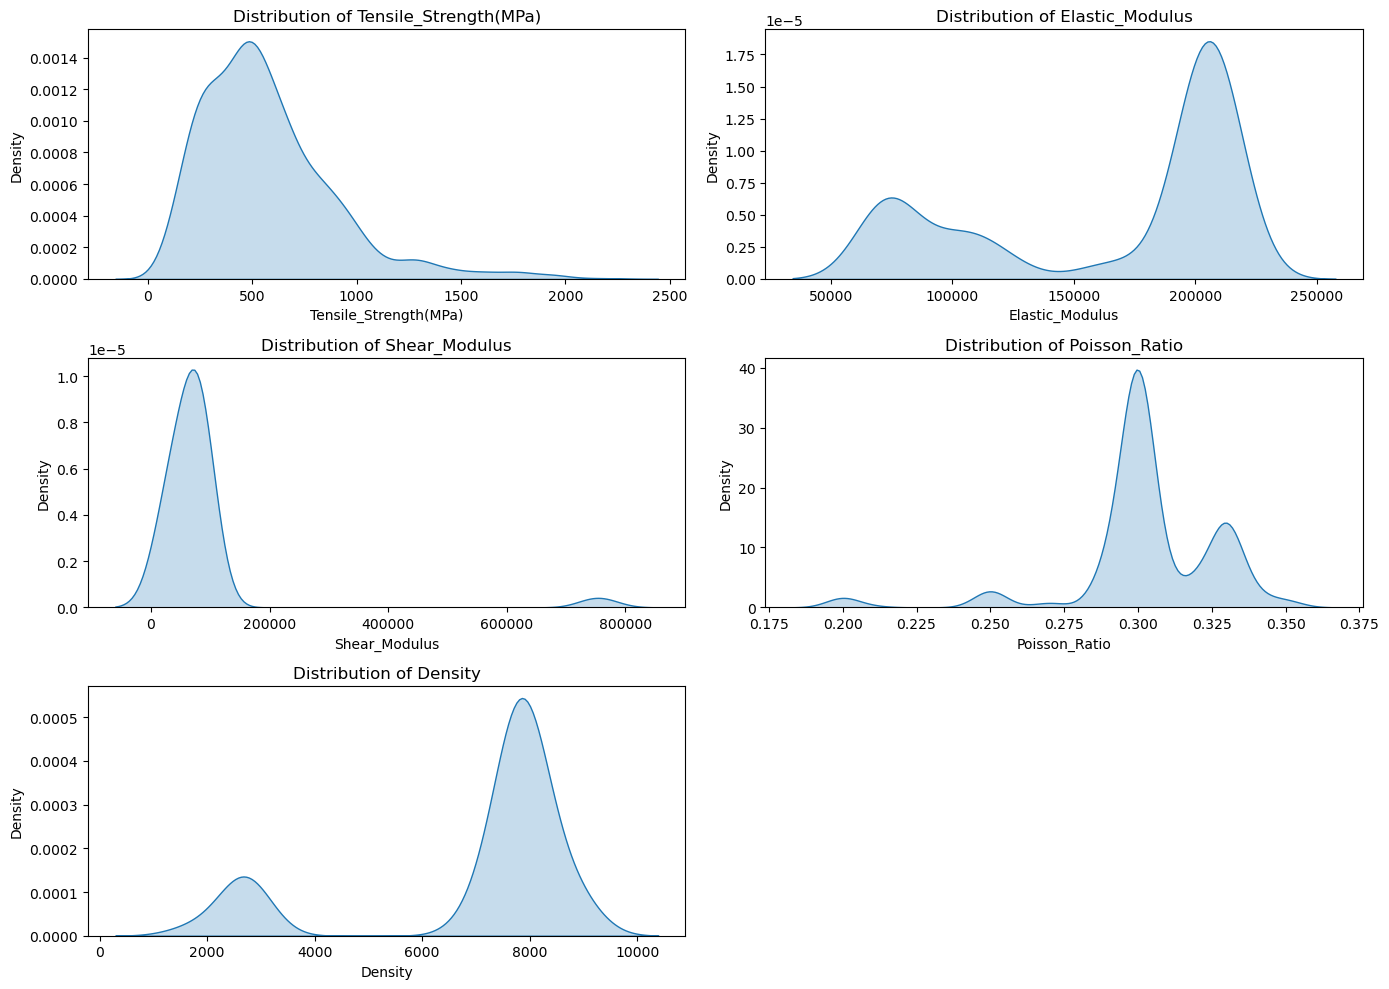

In [24]:
# KDE Plot
numeric_columns = ['Tensile_Strength(MPa)', 'Elastic_Modulus','Shear_Modulus', 'Poisson_Ratio', 'Density']

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 2, i + 1)
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

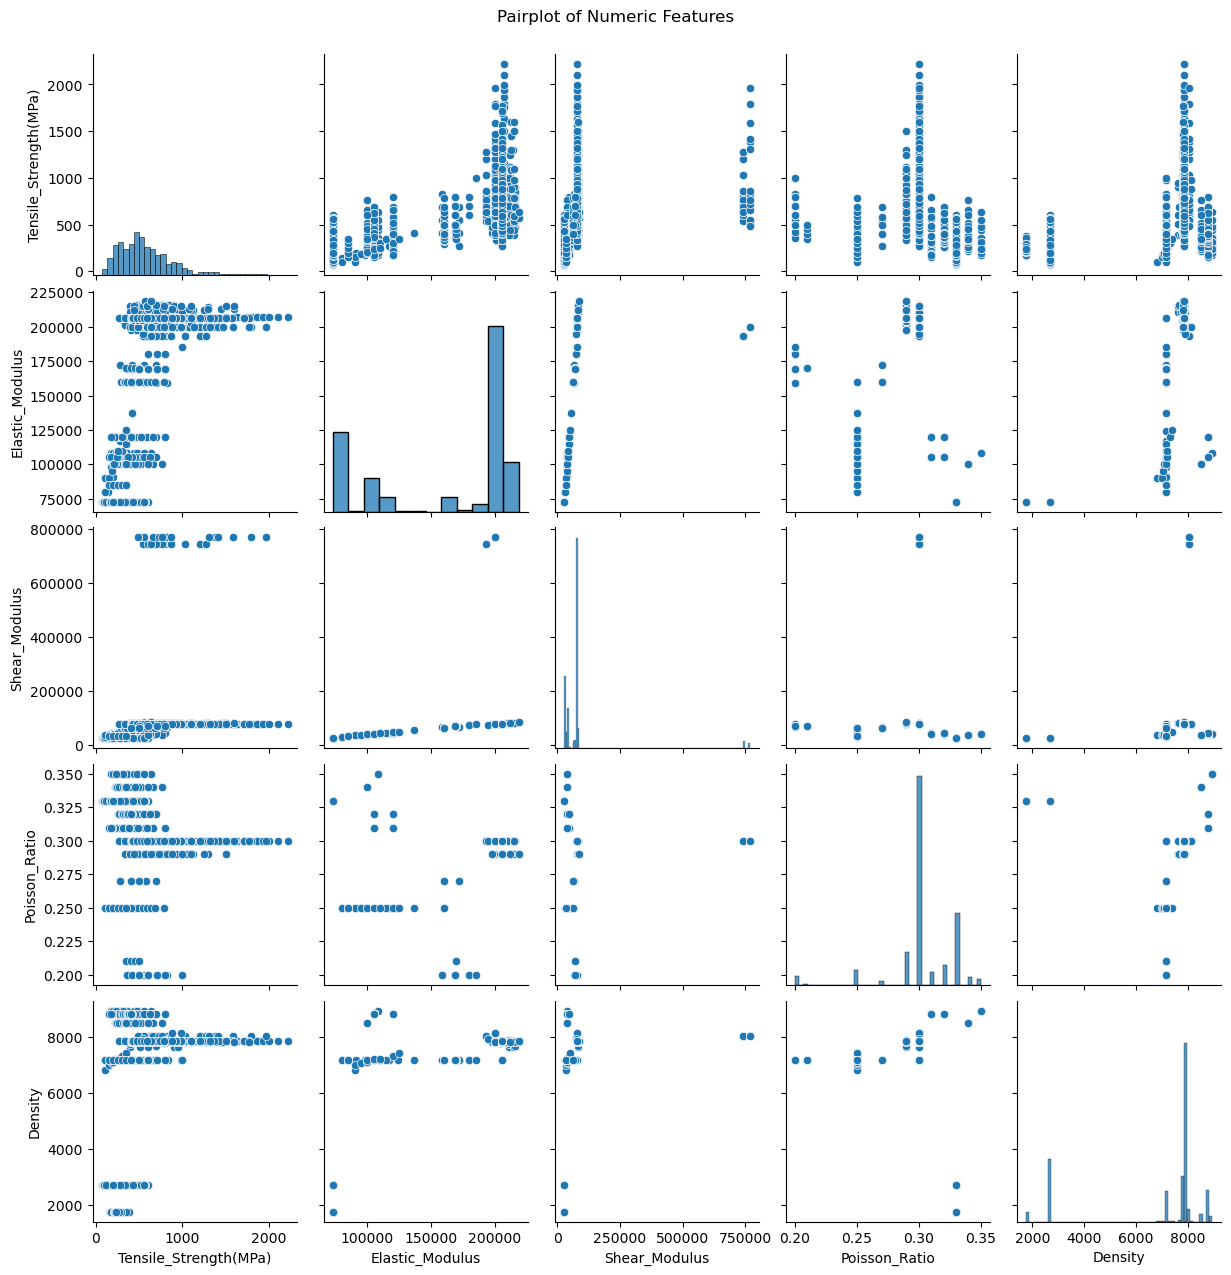

In [25]:
sns.pairplot(df[numeric_columns])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

***Applying Smote on dataset***

/tmp/ipykernel_12078/3632226868.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


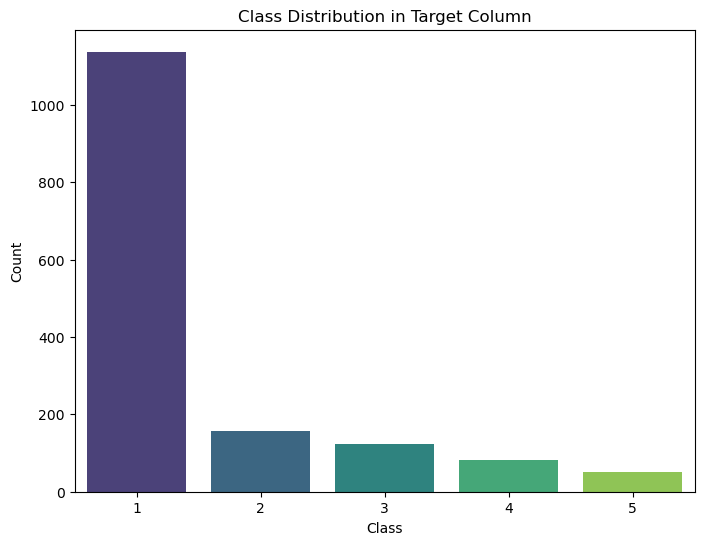

In [26]:
class_counts = df['rating'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

plt.title('Class Distribution in Target Column')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('rating', axis=1)  # Features
y = df['rating']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print(f"Original dataset shape: {X_train.shape}, {y_train.shape}")
print(f"Resampled dataset shape: {X_res.shape}, {y_res.shape}")


Original dataset shape: (1241, 9), (1241,)
Resampled dataset shape: (4505, 9), (4505,)


/tmp/ipykernel_12078/1138842677.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


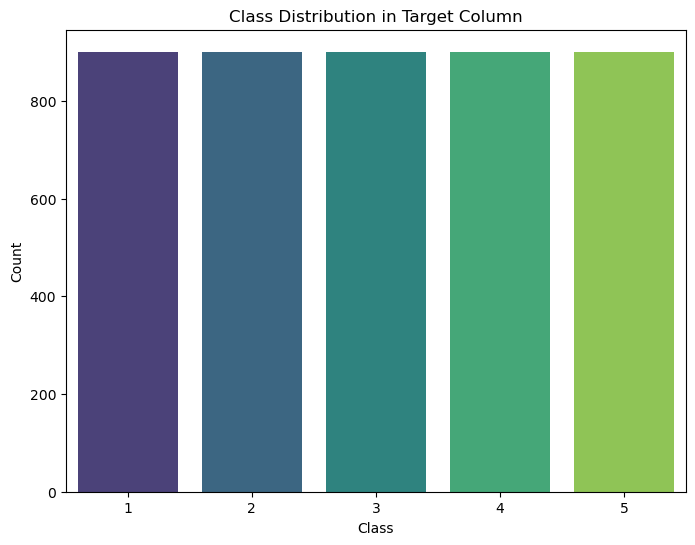

In [28]:
class_counts = y_res.value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

plt.title('Class Distribution in Target Column')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [29]:
X_train = X_res
y_train = y_res

***Traning the model***

**1. KNN**

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score (Macro Average): {f1:.2f}')

precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision (Macro Average): {precision:.2f}')

recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall (Macro Average): {recall:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.90
F1 Score (Macro Average): 0.71
Precision (Macro Average): 0.71
Recall (Macro Average): 0.72
Confusion Matrix:
[[227   8   1   0   0]
 [  2  20   6   0   0]
 [  0   2  18   1   1]
 [  0   2   2   8   1]
 [  0   0   0   6   6]]


**2. Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score (Macro Average): {f1:.2f}')

precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision (Macro Average): {precision:.2f}')

recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall (Macro Average): {recall:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.65
F1 Score (Macro Average): 0.37
Precision (Macro Average): 0.38
Recall (Macro Average): 0.42
Confusion Matrix:
[[179   9   5  35   8]
 [  6   9   1   3   9]
 [  0   7   6   4   5]
 [  0   6   1   2   4]
 [  0   2   1   2   7]]


/home/abhishek/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**3. Xgboost**

In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

y_train_adjusted = y_train - min(y_train)
y_test_adjusted = y_test - min(y_test)

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train_adjusted)

y_pred_adjusted = xgb.predict(X_test)

y_pred = y_pred_adjusted + min(y_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

try:
    roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test), multi_class='ovr')
    print(f'ROC-AUC Score: {roc_auc:.2f}')
except ValueError:
    print("ROC-AUC is not supported for multiclass directly.")


Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
Confusion Matrix:
[[236   0   0   0   0]
 [  0  24   3   0   1]
 [  0   1  19   1   1]
 [  0   0   3   8   2]
 [  0   0   0   5   7]]
ROC-AUC Score: 0.99


**4. Decision Tree**

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

try:
    roc_auc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test), multi_class='ovr')
    print(f'ROC-AUC Score: {roc_auc:.2f}')
except ValueError:
    print("ROC-AUC is not supported for multiclass directly.")


Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
Confusion Matrix:
[[235   1   0   0   0]
 [  1  23   3   0   1]
 [  0   4  17   1   0]
 [  0   0   4   8   1]
 [  0   0   1   3   8]]
ROC-AUC Score: 0.88


**5. Random Forest Classifier**

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

try:
    roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test), multi_class='ovr')
    print(f'ROC-AUC Score: {roc_auc:.2f}')
except ValueError:
    print("ROC-AUC is not supported for multiclass directly.")


Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.94
Confusion Matrix:
[[236   0   0   0   0]
 [  0  25   2   0   1]
 [  0   1  20   0   1]
 [  0   0   5   7   1]
 [  0   0   2   4   6]]
ROC-AUC Score: 0.96


**6. Ridge Classifier**

In [35]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

ridge_clf = RidgeClassifier()
ridge_clf.fit(X_train, y_train)

y_pred = ridge_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Ridge Classifier Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')



Ridge Classifier Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1 Score: 0.82
Confusion Matrix:
[[233   2   0   0   1]
 [  0  14   1   5   8]
 [  0   9   0   4   9]
 [  0   2   1   3   7]
 [  0   2   0   4   6]]


**7. Perceptron**

In [36]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

perceptron_clf = Perceptron()
perceptron_clf.fit(X_train, y_train)

y_pred = perceptron_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Perceptron Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')


Perceptron Accuracy: 0.06
Precision: 0.76
Recall: 0.06
F1 Score: 0.04
Confusion Matrix:
[[  6  12   0   0 218]
 [  0   0   0   0  28]
 [  0   0   0   0  22]
 [  0   0   0   0  13]
 [  0   0   0   0  12]]


/home/abhishek/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**8. Extra Trees**

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

et_clf = ExtraTreesClassifier(random_state=42)
et_clf.fit(X_train, y_train)

y_pred = et_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Extra Trees Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

try:
    roc_auc = roc_auc_score(y_test, et_clf.predict_proba(X_test), multi_class='ovr')
    print(f'ROC-AUC Score: {roc_auc:.2f}')
except ValueError:
    print("ROC-AUC is not supported for multiclass directly.")


Extra Trees Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
Confusion Matrix:
[[236   0   0   0   0]
 [  0  22   5   0   1]
 [  0   2  19   0   1]
 [  0   1   5   6   1]
 [  0   0   1   4   7]]
ROC-AUC Score: 0.96


**9. Bagging Classifier**

In [38]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

bagging_clf = BaggingClassifier(random_state=42)
bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Bagging Classifier Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

try:
    roc_auc = roc_auc_score(y_test, bagging_clf.predict_proba(X_test), multi_class='ovr')
    print(f'ROC-AUC Score: {roc_auc:.2f}')
except ValueError:
    print("ROC-AUC is not supported for multiclass directly.")


Bagging Classifier Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
Confusion Matrix:
[[234   2   0   0   0]
 [  0  23   4   0   1]
 [  0   4  17   0   1]
 [  0   1   4   7   1]
 [  0   1   1   3   7]]
ROC-AUC Score: 0.93


**10. Support Vector Machine (SVC)**

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

svc_clf = SVC()
svc_clf.fit(X_train, y_train)

y_pred = svc_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Support Vector Machine (SVC) Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')



Support Vector Machine (SVC) Accuracy: 0.49
Precision: 0.79
Recall: 0.49
F1 Score: 0.58
Confusion Matrix:
[[133  13   2  18  70]
 [  0   5   0   4  19]
 [  0   4   0   1  17]
 [  0   0   0   3  10]
 [  0   0   0   2  10]]


**11. Linear SVC**

In [40]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

linear_svc_clf = LinearSVC(max_iter=1000)
linear_svc_clf.fit(X_train, y_train)

y_pred = linear_svc_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Linear SVC Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')



/home/abhishek/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVC Accuracy: 0.68
Precision: 0.59
Recall: 0.68
F1 Score: 0.63
Confusion Matrix:
[[211  10   6   0   9]
 [ 20   0   0   0   8]
 [ 15   2   0   0   5]
 [ 13   0   0   0   0]
 [ 12   0   0   0   0]]


/home/abhishek/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/abhishek/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***12. Naive Bayes***

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Naive Bayes Accuracy: 0.61
Precision: 0.81
Recall: 0.61
F1 Score: 0.67
Confusion Matrix:
[[154  72   6   0   4]
 [  1  17   4   4   2]
 [  0   8   3  10   1]
 [  0   0   3   5   5]
 [  0   0   0   2  10]]


***13. Bernoulli Naive Bayes***

In [42]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)

y_pred = bernoulli_nb.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

f1_bernoulli_nb = f1_score(y_test, y_pred, average='weighted')
precision_bernoulli_nb = precision_score(y_test, y_pred, average='weighted')
recall_bernoulli_nb = recall_score(y_test, y_pred, average='weighted')

conf_matrix_bernoulli_nb = confusion_matrix(y_test, y_pred)

print(f"Bernoulli Naive Bayes Accuracy: {accuracy:.2f}")
print(f"Bernoulli Naive Bayes F1 Score: {f1_bernoulli_nb:.2f}")
print(f"Bernoulli Naive Bayes Precision: {precision_bernoulli_nb:.2f}")
print(f"Bernoulli Naive Bayes Recall: {recall_bernoulli_nb:.2f}")
print(f"Bernoulli Naive Bayes Confusion Matrix:\n{conf_matrix_bernoulli_nb}")


Bernoulli Naive Bayes Accuracy: 0.84
Bernoulli Naive Bayes F1 Score: 0.80
Bernoulli Naive Bayes Precision: 0.79
Bernoulli Naive Bayes Recall: 0.84
Bernoulli Naive Bayes Confusion Matrix:
[[233   3   0   0   0]
 [  0  28   0   0   0]
 [  0  22   0   0   0]
 [  0  13   0   0   0]
 [  0  12   0   0   0]]


/home/abhishek/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**14. AdaBoost**

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

ada = AdaBoostClassifier(n_estimators=50)
ada.fit(X_train, y_train)


y_pred_ada = ada.predict(X_test)

accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada:.2f}")

precision_ada = precision_score(y_test, y_pred_ada, average='weighted')
recall_ada = recall_score(y_test, y_pred_ada, average='weighted')
f1_ada = f1_score(y_test, y_pred_ada, average='weighted')
print(f"Precision: {precision_ada:.2f}")
print(f"Recall: {recall_ada:.2f}")
print(f"F1 Score: {f1_ada:.2f}")

cm_ada = confusion_matrix(y_test, y_pred_ada)
print(f"Confusion Matrix:\n{cm_ada}")

/home/abhishek/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.85
Precision: 0.79
Recall: 0.85
F1 Score: 0.81
Confusion Matrix:
[[236   0   0   0   0]
 [  0  28   0   0   0]
 [  0  22   0   0   0]
 [  0  13   0   0   0]
 [  0  12   0   0   0]]


/home/abhishek/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**15. LightGBM**

In [44]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


lgbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1)
lgbm.fit(X_train, y_train)


y_pred = lgbm.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


cm = confusion_matrix(y_test, y_pred)


print(f"LightGBM Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Confusion Matrix:\n{cm}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 4505, number of used features: 9
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
Confusion Matrix:
[[236   0   0   0   0]
 [  0  25   2   0   1]
 [  0   1  20   0   1]
 [  0   1   4   7   1]
 [  0   0   1   3   8]]


***16. Stochastic Gradient Descent (SGD)***

In [45]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, y_train)


y_pred_sgd = sgd.predict(X_test)


accuracy_sgd = accuracy_score(y_test, y_pred_sgd)


f1_sgd = f1_score(y_test, y_pred_sgd, average='weighted')
precision_sgd = precision_score(y_test, y_pred_sgd, average='weighted')
recall_sgd = recall_score(y_test, y_pred_sgd, average='weighted')


conf_matrix = confusion_matrix(y_test, y_pred_sgd)


print(f"SGD Classifier Accuracy: {accuracy_sgd:.2f}")
print(f"SGD Classifier F1 Score: {f1_sgd:.2f}")
print(f"SGD Classifier Precision: {precision_sgd:.2f}")
print(f"SGD Classifier Recall: {recall_sgd:.2f}")
print(f"SGD Classifier Confusion Matrix:\n{conf_matrix}")


SGD Classifier Accuracy: 0.37
SGD Classifier F1 Score: 0.43
SGD Classifier Precision: 0.77
SGD Classifier Recall: 0.37
SGD Classifier Confusion Matrix:
[[ 86 150   0   0   0]
 [  0  28   0   0   0]
 [  0  22   0   0   0]
 [  0  13   0   0   0]
 [  0  12   0   0   0]]


/home/abhishek/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***17. CatBoost***

In [46]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)
catboost.fit(X_train, y_train)


y_pred = catboost.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)


f1_catboost = f1_score(y_test, y_pred, average='weighted')
precision_catboost = precision_score(y_test, y_pred, average='weighted')
recall_catboost = recall_score(y_test, y_pred, average='weighted')


conf_matrix_catboost = confusion_matrix(y_test, y_pred)


print(f"CatBoost Accuracy: {accuracy:.2f}")
print(f"CatBoost F1 Score: {f1_catboost:.2f}")
print(f"CatBoost Precision: {precision_catboost:.2f}")
print(f"CatBoost Recall: {recall_catboost:.2f}")
print(f"CatBoost Confusion Matrix:\n{conf_matrix_catboost}")


CatBoost Accuracy: 0.93
CatBoost F1 Score: 0.93
CatBoost Precision: 0.93
CatBoost Recall: 0.93
CatBoost Confusion Matrix:
[[234   2   0   0   0]
 [  0  23   4   0   1]
 [  0   1  19   1   1]
 [  0   0   4   7   2]
 [  0   0   0   7   5]]


**18. Gradient Boosting**

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

f1_gb = f1_score(y_test, y_pred, average='weighted')
precision_gb = precision_score(y_test, y_pred, average='weighted')
recall_gb = recall_score(y_test, y_pred, average='weighted')

conf_matrix_gb = confusion_matrix(y_test, y_pred)

print(f"Gradient Boosting Accuracy: {accuracy:.2f}")
print(f"Gradient Boosting F1 Score: {f1_gb:.2f}")
print(f"Gradient Boosting Precision: {precision_gb:.2f}")
print(f"Gradient Boosting Recall: {recall_gb:.2f}")
print(f"Gradient Boosting Confusion Matrix:\n{conf_matrix_gb}")

Gradient Boosting Accuracy: 0.94
Gradient Boosting F1 Score: 0.94
Gradient Boosting Precision: 0.94
Gradient Boosting Recall: 0.94
Gradient Boosting Confusion Matrix:
[[236   0   0   0   0]
 [  0  23   3   1   1]
 [  0   1  19   1   1]
 [  0   0   4   7   2]
 [  0   0   1   4   7]]


***Best Models: Random Forest Classifier, xgboost, lightgbm with 95% of accuracy***

**Shap**

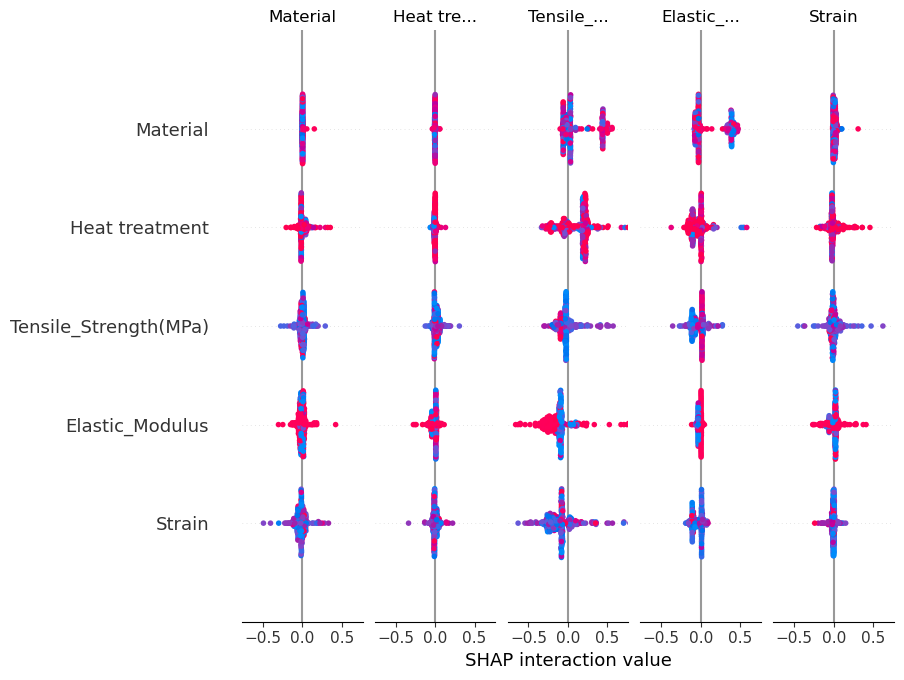

In [48]:
import shap
explainer = shap.TreeExplainer(rf_classifier)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

**Lime**

In [49]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
y_train_np = y_train.values if isinstance(y_train, pd.Series) else y_train

explainer = LimeTabularExplainer(
    training_data=X_train_np,  
    training_labels=y_train_np, 
    mode='classification',  
    class_names=[1, 2, 3, 4, 5], 
    discretize_continuous=True  
)

instance_idx = 10
instance = X_test.iloc[instance_idx].values 
explanation = explainer.explain_instance(
    instance, rf_classifier.predict_proba 
)

explanation.show_in_notebook(show_table=True, show_all=False)


/home/abhishek/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
